In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Load pre-processed data
FMG_CRC_BA = pd.read_csv("FMG_CRC_BA.csv", delimiter=",")
FMG_CRC_BA

,g__Acetanaerobacterium,g__Acetatifactor,g__Acetivibrio,g__Acidaminococcus,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aggregatibacter,g__Alistipes,g__Alkalitalea,...,g__Zobellella,g__Zoogloea,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
0,0.000016,0.000158,0.000519,0.000093,0.000051,0.000251,0.000856,0.000018,0.000000,0.000007,...,0.000040,0.000043,Healthy,-,65,M,26.5625,660,0,-
1,0.000253,0.000012,0.000380,0.002880,0.000033,0.000270,0.000492,0.000002,0.003794,0.000000,...,0.000021,0.000000,Healthy,-,40,M,25,400,993,-
2,0.000375,0.000000,0.000462,0.000072,0.000000,0.000132,0.000568,0.000002,0.003503,0.000000,...,0.000053,0.000024,Healthy,-,67,F,20.17325264,0,0,-
3,0.000003,0.000032,0.000079,0.002272,0.001376,0.000160,0.000273,0.000682,0.003374,0.000000,...,0.000088,0.000012,Healthy,-,77,M,24.4646016,300,813,-
4,0.000007,0.000026,0.000646,0.000429,0.000000,0.000219,0.000051,0.000000,0.000926,0.000051,...,0.000075,0.000000,Healthy,-,64,F,21.1552942,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.000053,0.000000,0.000279,0.000027,0.000000,0.000082,0.000447,0.000000,0.008111,0.000009,...,0.000000,0.000014,HS,-,51,F,18.08021039,90,669.9,-
612,0.000178,0.000003,0.000189,0.003788,0.000198,0.000067,0.000000,0.000014,0.044267,0.000018,...,0.000000,0.000000,HS,Normal,42,F,17.94181725,110,120,-
613,0.000022,0.000028,0.000012,0.000000,0.000047,0.000281,0.000000,0.000000,0.000000,0.000000,...,0.000164,0.000000,HS,-,70,F,20.504934,0,18.26,-
614,0.000000,0.000020,0.000122,0.000018,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000008,0.000000,HS,-,65,F,27.09925101,0,73.6929,-


In [15]:
class_counts = FMG_CRC_BA['Tumor location'].value_counts()
print(class_counts)

Tumor location
-                                     358
Rectum                                 95
Right colon                            83
Left colon                             69
Left colon and Right colon              7
Left colon and Rectum                   2
Rectum, Left colon and Right colon      1
Rectum and Left colon                   1
Name: count, dtype: int64


In [16]:

location_mapping = { # Integrate the too small amount of samples
    'Left colon and Right colon': 'Others',
    'Left colon and Rectum': 'Others',
    'Rectum and Left colon': 'Others',
    'Rectum, Left colon and Right colon': 'Others',
}

FMG_CRC_BA['Tumor location'] = FMG_CRC_BA['Tumor location'].replace(location_mapping)
# Drop rows where 'Tumor location' is '-'
FMG_CRC_BA = FMG_CRC_BA[FMG_CRC_BA['Tumor location'] != '-']
FMG_CRC_BA
#FecalMG_BA_Final.to_csv('SingaporeCRC_data/FecalMG_BA_Final', index=False)

,g__Acetanaerobacterium,g__Acetatifactor,g__Acetivibrio,g__Acidaminococcus,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aggregatibacter,g__Alistipes,g__Alkalitalea,...,g__Zobellella,g__Zoogloea,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
318,0.000563,0.000739,0.001539,0.000035,0.000006,0.000006,0.000825,0.000010,0.058677,0.000635,...,0.000012,0.000010,Stage_0,0,54,F,24.74745426,0,42.8571,Rectum
319,0.000239,0.000040,0.000857,0.000227,0.000137,0.000092,0.000327,0.000010,0.009547,0.000019,...,0.000059,0.000054,Stage_0,0,73,M,22.32142857,2400,149.207,Left colon
320,0.000015,0.000031,0.000255,0.009832,0.000000,0.000133,0.000418,0.000003,0.001899,0.000000,...,0.000075,0.000051,Stage_0,0,56,F,17.4817898,155,0,Left colon
321,0.000006,0.000090,0.000451,0.000043,0.000490,0.000466,0.000349,0.000099,0.000000,0.000000,...,0.000100,0.000017,Stage_0,0,65,M,21.8299522,0,0,Right colon
322,0.000039,0.000132,0.000398,0.000000,0.000000,0.000474,0.000913,0.000000,0.005291,0.000000,...,0.000064,0.000054,Stage_0,0,63,F,36.5230095,420,0,Rectum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.000228,0.000019,0.001156,0.000064,0.000000,0.000378,0.000820,0.000000,0.021462,0.000000,...,0.000015,0.000013,Stage_I_II,I,55,M,22.5981405,0,0,Right colon
572,0.000007,0.000022,0.000631,0.000007,0.000858,0.000939,0.000522,0.000004,0.005053,0.000037,...,0.000022,0.000000,Stage_I_II,I,67,F,24.44444444,0,0,Left colon
573,0.000211,0.000168,0.001760,0.000000,0.000007,0.000034,0.000136,0.000000,0.021752,0.000000,...,0.000010,0.000000,Stage_I_II,II,74,F,23.55555556,0,0,Right colon
574,0.000048,0.000028,0.000017,0.000009,0.000007,0.000487,0.000520,0.000000,0.001226,0.000006,...,0.000019,0.000020,Stage_I_II,I,73,M,19.84126984,700,204.45,Right colon


In [17]:
class_counts = FMG_CRC_BA['Tumor location'].value_counts()
print(class_counts)

Tumor location
Rectum         95
Right colon    83
Left colon     69
Others         11
Name: count, dtype: int64


In [18]:
# Prepare features and target variable
X = FMG_CRC_BA.drop(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
y = FMG_CRC_BA['Tumor location']
print("Unique values of y:", np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y)
y
print("Unique values of y:", np.unique(y))
print("Shape of y:", X_scaled.shape)
print("Shape of y:", y.shape)

Unique values of y: ['Left colon' 'Others' 'Rectum' 'Right colon']
Unique values of y: [0 1 2 3]
Shape of y: (258, 258)
Shape of y: (258,)


In [19]:
# Oversampling to ensure class balance
from imblearn.over_sampling import SMOTE
#oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X_scaled, y = oversampler.fit_resample(X_scaled,y)

sm = SMOTE(sampling_strategy='not majority', k_neighbors= 5, random_state=42)
X_scaled, y = sm.fit_resample(X_scaled, y)

print(X_scaled.shape)
print(y.shape)

(380, 258)
(380,)


Test on the single model:

Best Parameters: {'max_features': 0.1, 'n_estimators': 200}
Best Score: 0.5720218579234972
Test Set Accuracy: 0.6052631578947368


<Figure size 800x600 with 0 Axes>

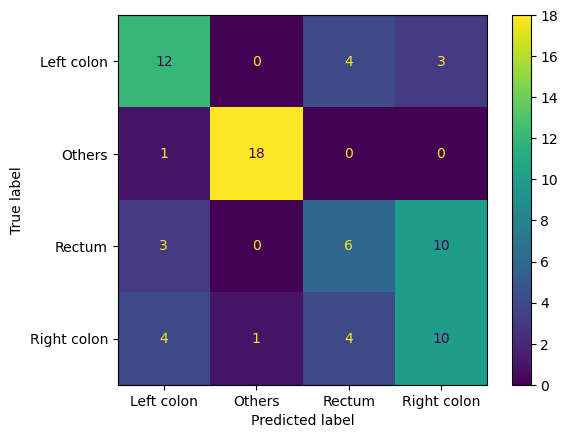

              precision    recall  f1-score   support

  Left colon       0.60      0.63      0.62        19
      Others       0.95      0.95      0.95        19
      Rectum       0.43      0.32      0.36        19
 Right colon       0.43      0.53      0.48        19

    accuracy                           0.61        76
   macro avg       0.60      0.61      0.60        76
weighted avg       0.60      0.61      0.60        76



In [20]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}

# Initialize RF classifier
rf_model = RandomForestClassifier(bootstrap=True, random_state=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter set selection
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Left colon', 'Others', 'Rectum', 'Right colon'])
plt.figure(figsize=(8, 6))
cm_display.plot()
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Left colon', 'Others', 'Rectum', 'Right colon'])
print(report)

In [21]:
# Train RF model with best parameters for calculating feature importances
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
y_score = best_rf_model.fit(X_train, y_train).predict_proba(X_test)

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.86
Macro-averaged One-vs-Rest ROC AUC score:
0.83


C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_1836\3500966728.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')


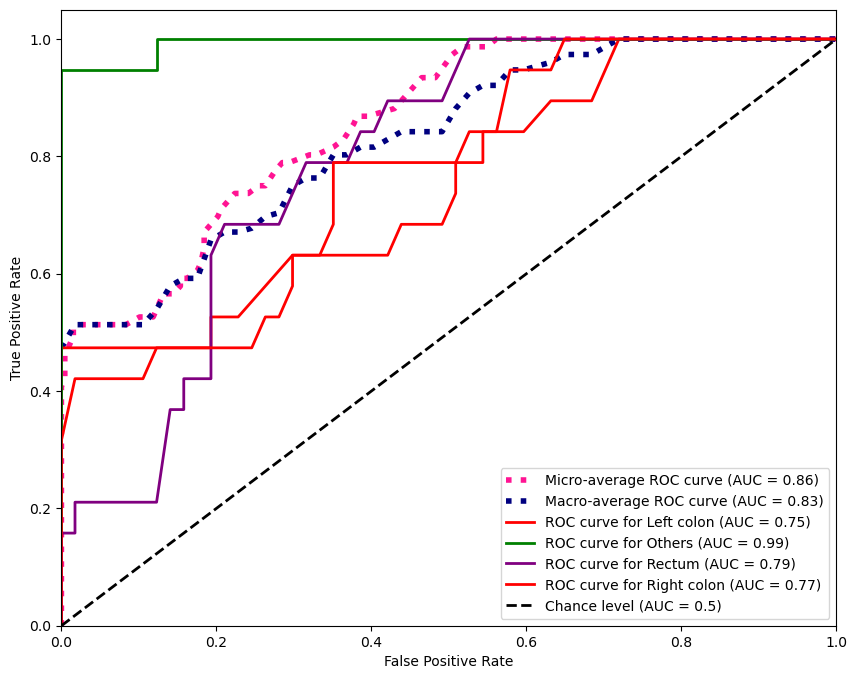

In [22]:
# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=np.arange(4))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(4)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(4):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 4

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = ['red', 'green', 'purple', 'red']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for {0} (AUC = {1:0.2f})'
             ''.format(le.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2, color='black', label='Chance level (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_1836\1304739108.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[top_20_indices], y=top_20_feature_names, palette="viridis")


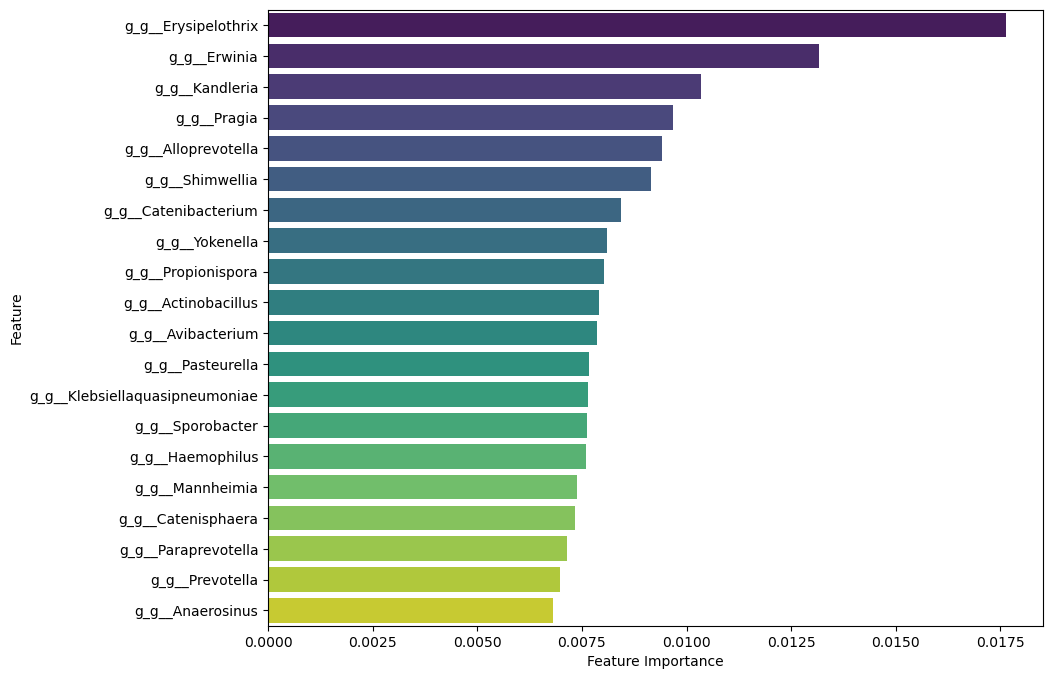

In [23]:
# Extract the best model
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

feature_importances = best_rf_model.feature_importances_
top_20_indices = feature_importances.argsort()[::-1][:20]
feature_names = X.columns

# Add the prefix "g_" to the top 20 feature names
top_20_feature_names = ["g_" + feature_names[i] for i in top_20_indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[top_20_indices], y=top_20_feature_names, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

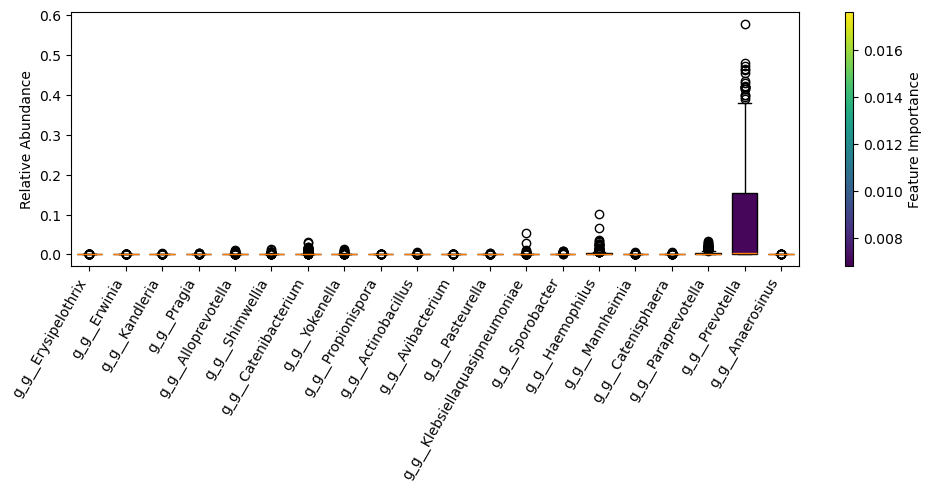

In [24]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Normalize feature importances
norm = Normalize(vmin=min(feature_importances[top_20_indices]), vmax=max(feature_importances[top_20_indices]))
cmap = plt.get_cmap('viridis')  # Choose a colormap
colors = [cmap(norm(importance)) for importance in feature_importances[top_20_indices]]

data = {}
scaled_X = np.log(X + 1)

for original_name, prefixed_name in zip(X.columns[top_20_indices], top_20_feature_names):
    data[prefixed_name] = scaled_X[original_name]

fig, ax = plt.subplots(figsize=(10, 5))

# Plot each box with the corresponding color based on feature importance
for i, (key, value) in enumerate(data.items()):
    box = ax.boxplot(value, positions=[i + 1], widths=0.7, patch_artist=True,
                     boxprops=dict(facecolor=colors[i], color='black'),
                     whiskerprops=dict(color='black'))

ax.set_ylabel('Relative Abundance', fontsize=10)
ax.set_xticks(range(1, len(data) + 1))
ax.set_xticklabels(data.keys(), rotation=60, ha='right', fontsize=10)
plt.tight_layout()

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar, not for plotting
cbar = plt.colorbar(sm, ax=ax, aspect=30)
cbar.set_label('Feature Importance', fontsize=10)

plt.show()

EMC_CanML:

In [25]:
# ML framework

from sklearn.metrics import precision_score, recall_score, f1_score

# Define parameters for RF model
params = {
    'n_estimators': [200, 500],
    'max_features': [0.1, 0.2, 0.3],
}


rf_model = RandomForestClassifier(bootstrap=True, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_iterations = 20
robustness_train_scores = []
robustness_test_scores = []
robustness_auroc = []
precision_scores = []
recall_scores = []
f1_scores = []
important_features = []

for i in range(n_iterations):

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=i, stratify=y)

    grid_search = GridSearchCV(estimator=rf_model, param_grid=params, scoring='accuracy', cv=cv)
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the training data of the resampled set
    train_score = grid_search.best_score_
    robustness_train_scores.append(train_score)

    # Evaluate the model on the test data of the resampled set
    y_pred = grid_search.best_estimator_.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    robustness_test_scores.append(test_score)
    
    # Calculate AUROC score
    y_test_proba = grid_search.best_estimator_.predict_proba(X_test)
    test_auroc = roc_auc_score(y_test, y_test_proba, multi_class='ovr', average='macro')
    robustness_auroc.append(test_auroc)

# Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Extract the best model's parameters and feature importances
    best_params = grid_search.best_params_
    best_rf_model = RandomForestClassifier(random_state=i, **best_params)
    best_rf_model.fit(X_train, y_train)

    feature_importances = best_rf_model.feature_importances_
    top_20_indices = feature_importances.argsort()[::-1][:20]
    feature_names = X.columns
    top_20_features = feature_names[top_20_indices]
    important_features.extend(top_20_features)


robustness_train_mean = np.mean(robustness_train_scores)
robustness_train_std = np.std(robustness_train_scores)

robustness_test_mean = np.mean(robustness_test_scores)
robustness_test_std = np.std(robustness_test_scores)

robustness_auroc_mean = np.mean(robustness_auroc)
robustness_auroc_std = np.std(robustness_auroc)

# Calculate mean and standard deviation for precision, recall, and F1 score
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print("Train Mean Accuracy:", robustness_train_mean)
print("Train Std Accuracy:", robustness_train_std)
print("Test Mean Accuracy:", robustness_test_mean)
print("Test Std Accuracy:", robustness_test_std)
print("Mean AUROC:", robustness_auroc_mean)
print("Std AUROC:", robustness_auroc_std)
print("Mean Precision:", mean_precision)
print("Std Precision:", std_precision)
print("Mean Recall:", mean_recall)
print("Std Recall:", std_recall)
print("Mean F1 Score:", mean_f1)
print("Std F1 Score:", std_f1)


Train Mean Accuracy: 0.6166639344262295
Train Std Accuracy: 0.022669374209243823
Test Mean Accuracy: 0.6177631578947369
Test Std Accuracy: 0.04623553902845815
Mean AUROC: 0.8442232225300093
Std AUROC: 0.023752898255555606
Mean Precision: 0.6170639855822712
Std Precision: 0.04716832314658476
Mean Recall: 0.6177631578947368
Std Recall: 0.04623553902845815
Mean F1 Score: 0.6129555058292453
Std F1 Score: 0.0473070170233492


In [26]:
print(f"Train_accuracy_scores: {robustness_train_scores}" )
print(f"Test_accuracy_scores: {robustness_test_scores}" )
print(f"Test_AUROC_scores: {robustness_auroc}" )
print(f"precision_scores: {precision_scores}" )
print(f"recall_scores: {recall_scores}" )
print(f"f1_scores: {f1_scores}" )

Train_accuracy_scores: [0.552896174863388, 0.6514207650273225, 0.5954098360655738, 0.6414754098360655, 0.5986338797814208, 0.6184699453551913, 0.6344262295081967, 0.6383060109289618, 0.5989071038251366, 0.6217486338797815, 0.6414754098360655, 0.6118032786885246, 0.6316393442622951, 0.5989071038251366, 0.5985792349726775, 0.6186885245901639, 0.6315300546448087, 0.6019125683060109, 0.638360655737705, 0.6086885245901639]
Test_accuracy_scores: [0.6973684210526315, 0.5921052631578947, 0.6052631578947368, 0.5921052631578947, 0.6578947368421053, 0.5789473684210527, 0.5657894736842105, 0.5526315789473685, 0.6710526315789473, 0.5526315789473685, 0.6578947368421053, 0.6052631578947368, 0.5526315789473685, 0.6578947368421053, 0.6842105263157895, 0.6578947368421053, 0.6447368421052632, 0.5657894736842105, 0.618421052631579, 0.6447368421052632]
Test_AUROC_scores: [0.900854108956602, 0.8284856879039705, 0.8625346260387812, 0.8180978762696214, 0.840258541089566, 0.8509926131117267, 0.8312557710064634

In [27]:
# The list of important features
print("Total number of selected features:", len(important_features))
important_features = pd.DataFrame(important_features)
important_features.to_csv('FI_RF_FMG_TL.csv', index=False)

Total number of selected features: 400
